In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from mpl_toolkits.mplot3d import Axes3D

In [2]:
N = 1000
X = np.random.random((N,2)) * 6 - 3 #Uniformly distributed between (-3,+3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1]) # our features are x1 and x2. 

In [3]:
print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


y=cos(2x 
1
​
 )+cos(3x 
1
​
 )

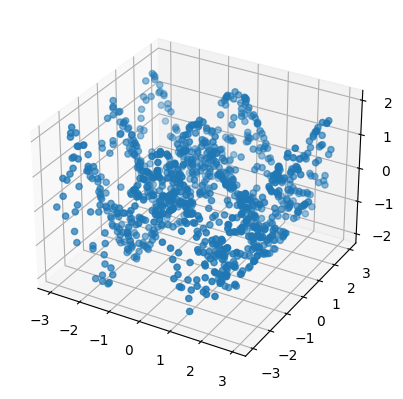

In [4]:
# Plotting dataset
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(X[:,0],X[:,1],Y)


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_shape=(2,),activation="relu"),
    tf.keras.layers.Dense(1) #Since it's regression,we don't use any function for the output layer and we pass in only 1 neuron for the output layer
])

In [6]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.01), # We can use our learning rate via this way 
    loss="mse",
    metrics=["mse"]
)
r = model.fit(X,Y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9951 - mse: 0.9951
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9530 - mse: 0.9530
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9327 - mse: 0.9327
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9446 - mse: 0.9446
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8777 - mse: 0.8777
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8100 - mse: 0.8100
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7407 - mse: 0.7407
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6370 - mse: 0.6370
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5902 - mse: 0.5902
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5530 - mse: 0.5530
Epoch 11/100
32/32 [==============================] - 0s 2m

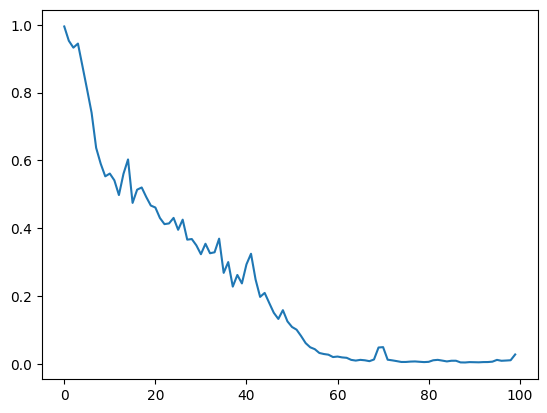

In [7]:
plt.plot(r.history["loss"])

79/79 [==============================] - 0s 3ms/step


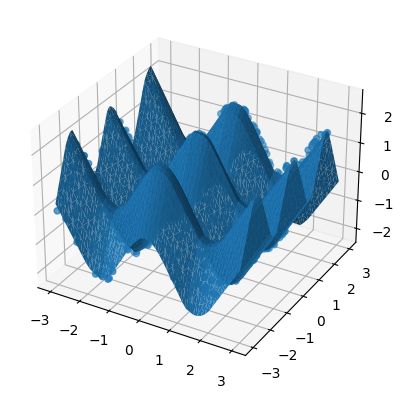

In [13]:
#Plotting the prediction surface:

# Our data
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(X[:,0],X[:,1],Y)

#Surface plot
line = np.linspace(-3,3,50) # 50 elements with each have equal distance between -3 and 3
xx,yy=np.meshgrid(line,line)  
Xgrid=np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth=0.2,antialiased=True)


plt.show()